In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [15]:
(x_train , _) , (x_test , _) = keras.datasets.cifar10.load_data()

In [16]:
x_train = x_train/255.0
x_test = x_test/255.0

In [17]:
resized_x_train = x_train.reshape(-1,3072).astype("float32")
resized_x_test = x_test.reshape(-1,3072).astype("float32")

In [18]:
print(f"resized x train shape : {resized_x_train.shape}")
print(f"resized x test shape : {resized_x_test.shape}")

resized x train shape : (50000, 3072)
resized x test shape : (10000, 3072)


In [49]:
encoder = keras.models.Sequential([
    keras.layers.Dense(1024,input_shape = (3072,),activation = "elu"),
    keras.layers.Dense(512 , activation = "elu"),
    keras.layers.Dense(256 ),
])

decoder = keras.models.Sequential([
    keras.layers.Dense(512 ,input_shape = (256,), activation = "elu"),
    keras.layers.Dense(1024 , activation = "elu"),
    keras.layers.Dense(3072 , activation = "sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
inputs = keras.Input(shape = (3072,))
h = encoder(inputs)
outputs = decoder(h)

autoEncoder = keras.Model(inputs , outputs)

In [51]:
autoEncoder.compile(loss = "mse" , optimizer = keras.optimizers.Adam(learning_rate = 0.001))

In [52]:
autoEncoder.fit(resized_x_train , resized_x_train , shuffle = True , epochs = 10 , verbose = 2 , batch_size = 32 , validation_data = (resized_x_test , resized_x_test))

Epoch 1/10
1563/1563 - 11s - 7ms/step - loss: 0.0161 - val_loss: 0.0122
Epoch 2/10
1563/1563 - 7s - 5ms/step - loss: 0.0110 - val_loss: 0.0118
Epoch 3/10
1563/1563 - 10s - 6ms/step - loss: 0.0095 - val_loss: 0.0095
Epoch 4/10
1563/1563 - 11s - 7ms/step - loss: 0.0090 - val_loss: 0.0088
Epoch 5/10
1563/1563 - 6s - 4ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 6/10
1563/1563 - 7s - 4ms/step - loss: 0.0082 - val_loss: 0.0083
Epoch 7/10
1563/1563 - 11s - 7ms/step - loss: 0.0079 - val_loss: 0.0083
Epoch 8/10
1563/1563 - 10s - 6ms/step - loss: 0.0077 - val_loss: 0.0081
Epoch 9/10
1563/1563 - 7s - 4ms/step - loss: 0.0075 - val_loss: 0.0079
Epoch 10/10
1563/1563 - 7s - 4ms/step - loss: 0.0074 - val_loss: 0.0075


In [53]:
num_images = 10
sample_images = resized_x_test[:num_images]

In [54]:
encoded_images = encoder(sample_images)
decoded_images = decoder(encoded_images)

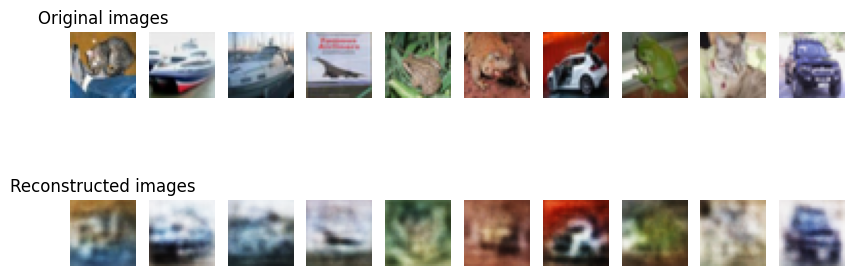

In [55]:
fig , axes = plt.subplots(2 , num_images , figsize = (10,4))
for i in range(num_images):
  axes[0,i].imshow(sample_images[i].reshape(32,32,3))
  axes[0,i].axis("off")

  axes[1,i].imshow(decoded_images[i].numpy().reshape(32,32,3))
  axes[1,i].axis("off")
axes[0,0].set_title("Original images")
axes[1,0].set_title("Reconstructed images")
plt.show()

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
autoEncoder.save('/content/drive/MyDrive/MyModels/autoEncodersModels/cifar10.h5')